In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [8]:
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

OSError: NotImplemented: Support for codec 'snappy' not built

In [9]:
test = pd.concat([xtest, ytest], axis=1)
# Generar columna predicción
prob_0 = ytest.value_counts()[0]/ ytest.value_counts().sum()
test['ypred'] = np.random.choice(2,len(test), p=[prob_0, 1-prob_0])
# Predeciremos que el valor que toma la variable 
# objetivo es siempre 0, ya que acertaremos más de un 
# 98% de las veces.


NameError: name 'xtest' is not defined

In [10]:
print("Classification Report")
print(classification_report(test['fatality'], test['ypred']))

Classification Report


NameError: name 'test' is not defined

In [5]:
np.random.choice(np.arange(0,2), p=[0.5, 1-0.5])

1

In [6]:
recall_score(test['fatality'], test['ypred'])

0.015269151138716356

In [7]:
precision_score(test['fatality'], test['ypred'])

0.015250403877221324

In [8]:
accuracy_score(test['fatality'], test['ypred'])

0.9699215822201682

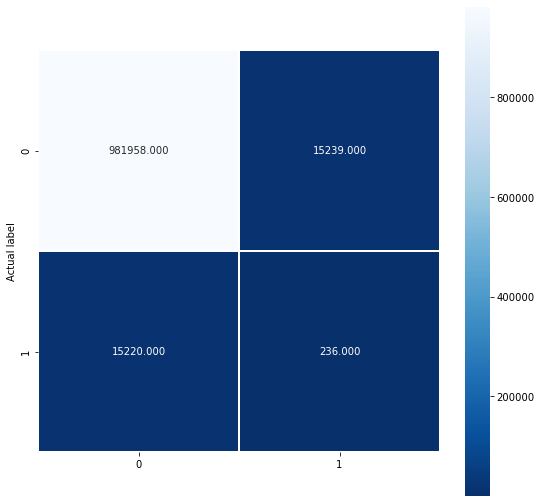

In [9]:
cm_gbt = confusion_matrix(test['fatality'], test['ypred'])

plt.figure(figsize=(9,9))
sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');

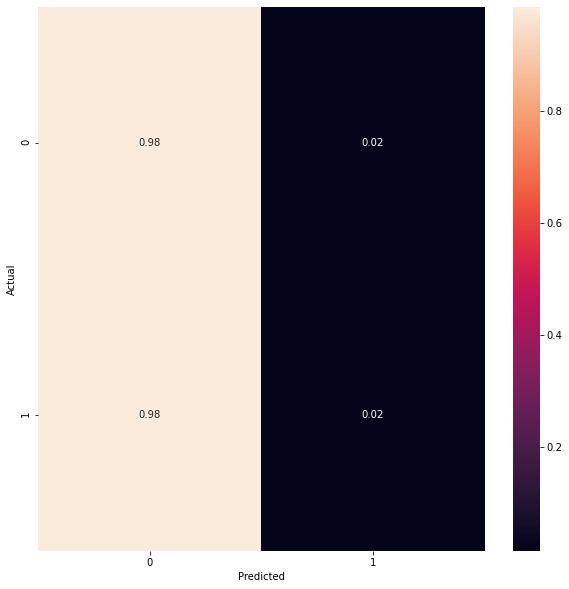

In [10]:
cm = confusion_matrix(test['fatality'], test['ypred'])
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Base Model 2


In [11]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [12]:
modelo_base = DummyClassifier(strategy='stratified', random_state=0)
modelo_base.fit(xtrain, ytrain)
ypred =modelo_base.predict(xtest)
ypred_proba = modelo_base.predict_proba(xtest)

In [13]:
evaluate_model(ytest,ypred,ypred_proba)

ROC-AUC score of the model: 0.49958685184478924
Accuracy of the model: 0.9702494339127026

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    997197
           1       0.01      0.01      0.01     15456

    accuracy                           0.97   1012653
   macro avg       0.50      0.50      0.50   1012653
weighted avg       0.97      0.97      0.97   1012653


Confusion matrix: 
[[982308  14889]
 [ 15238    218]]



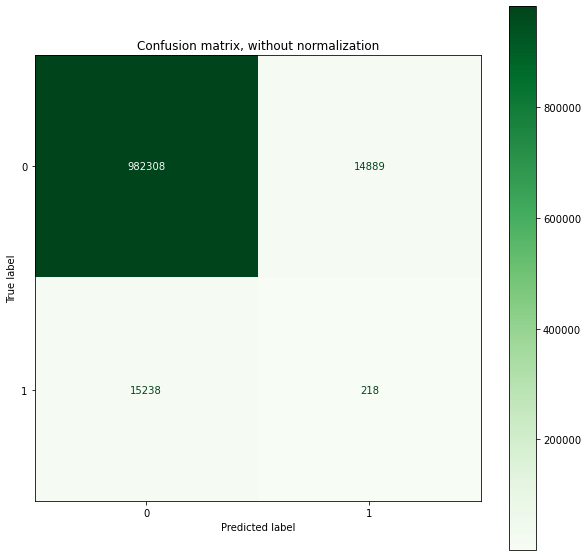

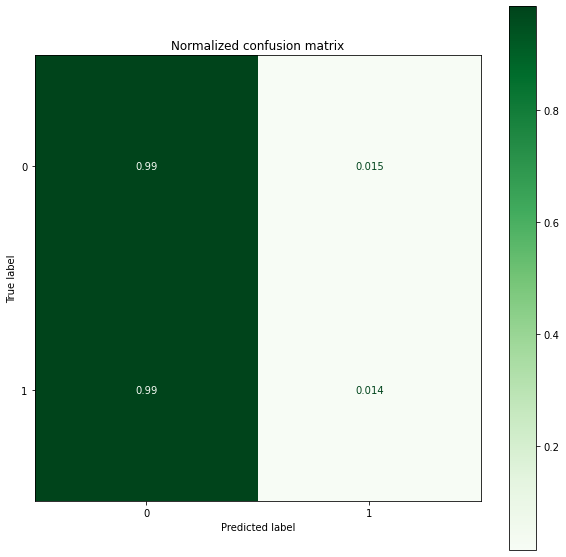

In [14]:

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = plot_confusion_matrix(modelo_base, xtest, ytest,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax=ax)
    disp.ax_.set_title(title)


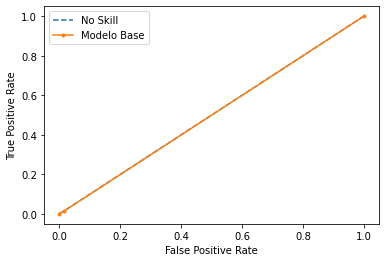

In [15]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Modelo Base')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Naive Bayes

In [16]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(xtrain, ytrain)
ypred = naive_bayes.predict(xtest)
ypred_proba = naive_bayes.predict_proba(xtest)

C:\Users\atell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
evaluate_model(ytest,ypred,ypred_proba)

ROC-AUC score of the model: 0.7873892350291511
Accuracy of the model: 0.8959248627121037

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    997197
           1       0.07      0.48      0.12     15456

    accuracy                           0.90   1012653
   macro avg       0.53      0.69      0.53   1012653
weighted avg       0.98      0.90      0.93   1012653


Confusion matrix: 
[[899825  97372]
 [  8020   7436]]



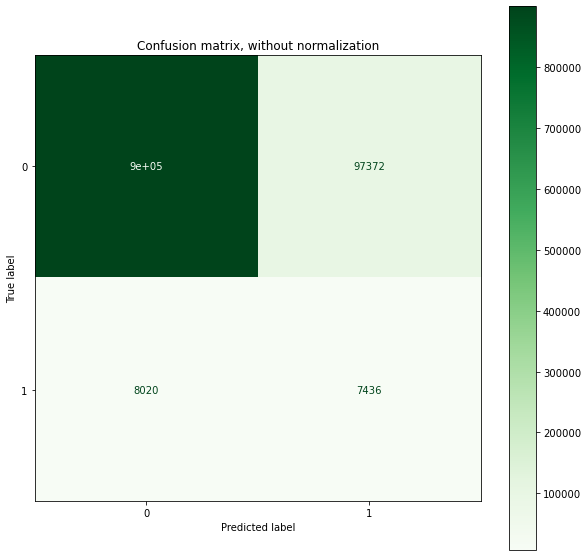

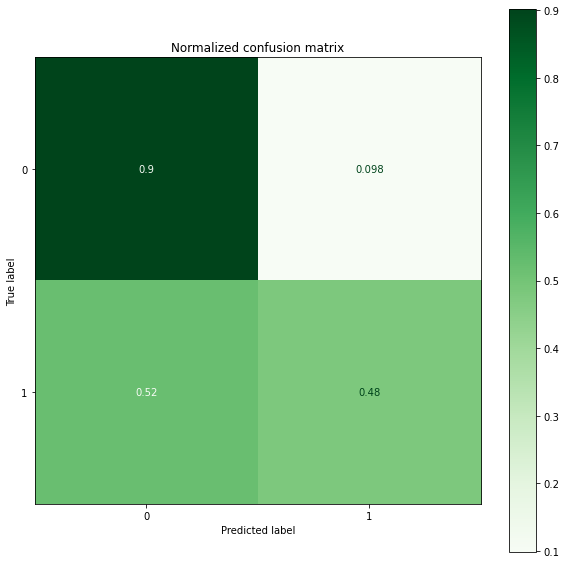

In [18]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = plot_confusion_matrix(naive_bayes, xtest, ytest,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax=ax)
    disp.ax_.set_title(title)

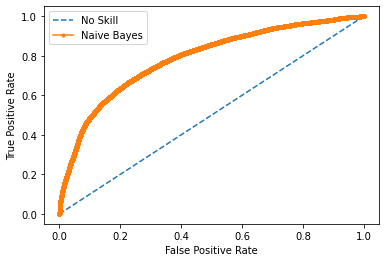

In [19]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [20]:
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.003422, G-Mean=0.718


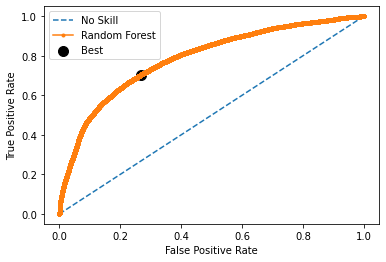

In [21]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Jugar con threshold

In [22]:
ypred_new_threshold = (ypred_proba[:,1]>=0.003422).astype(int)
ypred_new_threshold

array([1, 0, 0, ..., 0, 1, 0])

In [23]:
evaluate_model(ytest,ypred_new_threshold,ypred_proba)

ROC-AUC score of the model: 0.7873892350291511
Accuracy of the model: 0.7322883554386349

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    997197
           1       0.04      0.70      0.07     15456

    accuracy                           0.73   1012653
   macro avg       0.52      0.72      0.46   1012653
weighted avg       0.98      0.73      0.83   1012653


Confusion matrix: 
[[730680 266517]
 [  4582  10874]]



AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

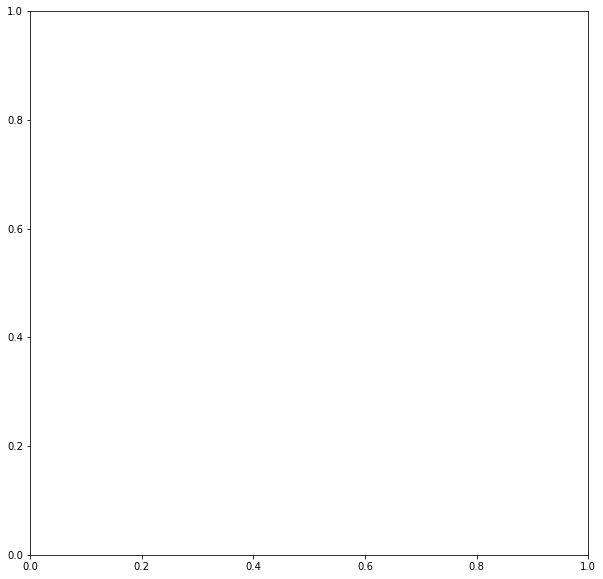

In [2]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax = ax)
    ax.set_title(title)